              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

   true_label  predicted_label  prob_malignant
0           0                0        0.114654
1           1                1        0.999991
2           1                1        0.996936
3           0                0        0.000502
4           0                0        0.000060


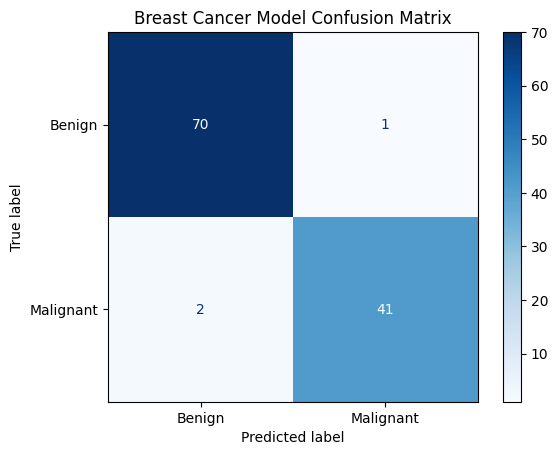

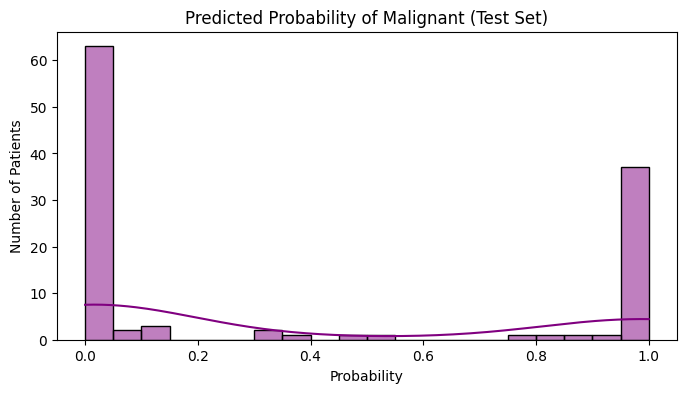

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
df = pd.read_csv('Breast_cancer_dataset.csv')
df = df.drop(columns=['id', 'Unnamed: 32'])

#store the numbers converted into a new column called 'diagnosis_numerica'
df['diagnosis_numerica'] = df['diagnosis'].map({'M' : 1, 'B' : 0})  
#after converting to numbers we need x to drop the selected columns so machine can guess answers in y, that y is showing ' dignosis'
x = df.drop(columns=['diagnosis', 'diagnosis_numerica'])              #leave all columns excpet the selcetd ones
y = df['diagnosis_numerica']                                           # this column contains the answer to each tumor that will be guessed





#some columns have bigger ranges than others and models get confused to fix that we will use scaling a built in model
#put every feature on the same footing
#includes compute mean, standard deviation: mean = 0 and standard deviation = 1 for every feature
scale = StandardScaler()
x_scaled = scale.fit_transform(x)    # this builtin model will find the mean ans std for each column .scale will scale it automatically

#Training VS.Testing Split (split data into two stets to memorize pattern)
#training set( 80% of the rows in data)
#testing set( the remaning 20%)
 
#in simple words, what we are doing here is 
#1. we cleaned the data 
#2. we converted 'M' and 'B' to numberes since it cannot be read as it is 
#3. X AND Y is like a quiz x are the questions in each columns not including the answers which is the columns 'diagnosis' and the new one that has the new convertion stored, 'dignoses_numerica
#4. scale everything incase columns with bigger numbers don't dominate other columns with less numbers. and it does that by calculating mean = 0 and standard deviation =1
#5. As we said it is a quiz and to show the machine that 20% of data is the quiz and the 80% it trains on to learn pattern
#6. logisticregression() creates that model that is ready to learn   max_iter=100000  are steps to learn from data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y , test_size=0.2, random_state=42)    #test_size=0.2 means 20% to test
model = LogisticRegression(max_iter=10000)    #model has trained in the 80% above now giving it that 20% to test on
model.fit(x_train, y_train)
y_pred = model.predict(x_test)         #answers are here
#split, fit, predict
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))



# 1. Recover the original row indices of X_test
#    (train_test_split keeps those intact in y_test.index)
test_idx = y_test.index

# 2. Build a DataFrame of the test features if you want them,
#    otherwise start with an empty DataFrame:
results = pd.DataFrame(index=test_idx)

# 3. Add the true and predicted labels
results['true_label']      = y_test
results['predicted_label'] = y_pred

# 4. Add the probability of the “malignant” class (class 1)
results['prob_malignant'] = model.predict_proba(x_test)[:, 1]

# 5. (Optional) bring back one or two key features for context
# results['radius_mean'] = df.loc[test_idx, 'radius_mean']
# results['texture_mean'] = df.loc[test_idx, 'texture_mean']

# 6. Reset index if you want a simple 0–n integer index
results = results.reset_index(drop=True)

# 7. Inspect
print(results.head())

# 8. Export for Tableau
results.to_csv('breast_cancer_model_results.csv', index=False)


ConfusionMatrixDisplay.from_estimator(
    model, x_test, y_test,
    display_labels=['Benign', 'Malignant'],
    cmap='Blues'
)
plt.title('Breast Cancer Model Confusion Matrix')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(results['prob_malignant'], kde=True, color='purple', bins=20)
plt.title('Predicted Probability of Malignant (Test Set)')
plt.xlabel('Probability')
plt.ylabel('Number of Patients')
plt.show()